In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit
import scipy.stats as stats
import seaborn as sns
from ipywidgets import interact
import ipywidgets as widgets

plt.rcParams['figure.figsize'] = [5, 3]

In [2]:

namePrefix = "pIkkt_type1"
NMAT = 4
NCOL = 40
os.chdir("/mnt/beegfs/hmurali/ML/data")

def standardize(data):
    return (data - np.mean(data)) / (np.std(data))

# 4D IKKT Type 1

In [6]:
dataN40 = {}
data2N40 = {}
dataN50 = {}
data2N50 = {}
dataSourceN40g150 = {}
gs40 = [5.,10.,15., 20., 30., 40., 100., 150., 200., 250., 300.]
gs50 = [5., 15., 40., 80., 100., 150., 300.]
alphas = [0.5, 1, 2, 4, 6, 10]
for g in gs40:
    saveFileEv = f"eigenvalues_{namePrefix}_{NMAT}d_g{round(g,4)}_N{NCOL}.dat"
    saveFileComms = f"comm2_{namePrefix}_{NMAT}d_g{round(g,4)}_N{NCOL}.dat"
    dataN40[g] = np.fromfile(saveFileEv, dtype=np.complex128).reshape(-1, 5 * NCOL)
    data2N40[g] = np.fromfile(saveFileComms, dtype=np.complex128).reshape(-1, 2)
for g in gs50:
    saveFileEv = f"eigenvalues_{namePrefix}_{NMAT}d_g{round(g,4)}_N{50}.dat"
    saveFileComms = f"comm2_{namePrefix}_{NMAT}d_g{round(g,4)}_N{50}.dat"
    dataN50[g] = np.fromfile(saveFileEv, dtype=np.complex128).reshape(-1, 5 * 50)
    data2N50[g] = np.fromfile(saveFileComms, dtype=np.complex128).reshape(-1, 2)

dataSourceN40g150[0.5] = np.fromfile(f"eigenvalues_{namePrefix}_Line0.5_g150.0_N40.dat", dtype=np.complex128).reshape(-1, 5 * 40)

for a in alphas[2:]:
    dataSourceN40g150[a] = np.fromfile(f"eigenvalues_{namePrefix}_Line{a}_g150.0_N40.dat", dtype=np.complex128).reshape(-1, 5 * 40)

In [4]:
dataSourceN40g150[0.5].shape

(300, 200)

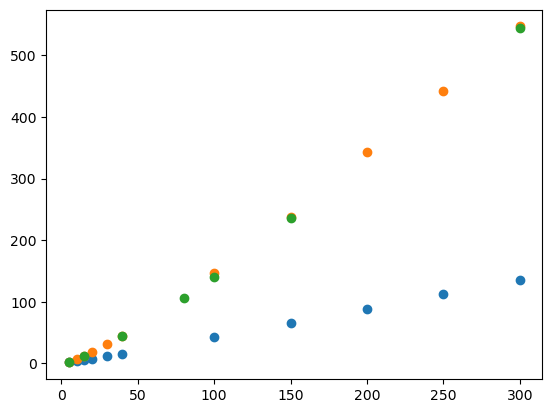

In [7]:
plt.plot(gs40, [np.mean(-data2N40[g][50:, 0].real)/NCOL for g in gs40], 'o')
plt.plot(gs40, [np.mean(data2N40[g][50:, 1].real)/NCOL for g in gs40], 'o')
plt.plot(gs50, [np.mean(data2N50[g][50:, 1].real)/50 for g in gs50], 'o')

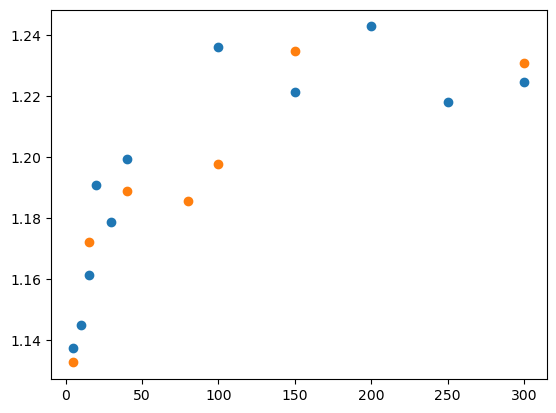

In [7]:
plt.plot(np.array(gs40), [np.mean(data2N40[g][50:, 1].real) / 40 / np.mean(dataN40[g][50:,:4*40].real**4) for g in gs40], 'o')
plt.plot(np.array(gs50), [np.mean(data2N50[g][50:, 1].real) / 50 / np.mean(dataN50[g][50:,:4*50].real**4) for g in gs50], 'o')

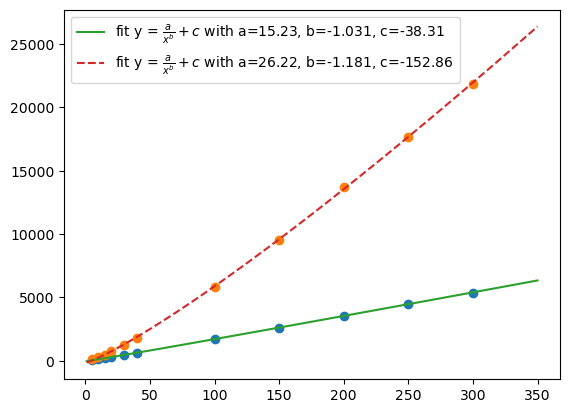

In [8]:
power_law = lambda x, a, b, c: a * x**(-b) + c
ys = [np.mean(-data2N40[g][50:, 0].real) for g in gs40]
ys2 = [np.mean(data2N40[g][50:, 1].real) for g in gs40]
popt, pcov = curve_fit(power_law, gs40, ys, p0=[1, 0.5, 0.2], maxfev=10000)
popt2, pcov2 = curve_fit(power_law, gs40, ys2, p0=[1, 0.5, 0.2], maxfev=10000)
plt.plot(np.array(gs40), ys, 'o')
plt.plot(np.array(gs40), ys2, 'o')
plt.plot(xs:=np.linspace(1, 350, 100), power_law(xs, *popt), '-', label=f"fit y = $\\frac{{a}}{{x^b}} + c$ with a={popt[0]:.2f}, b={popt[1]:.3f}, c={popt[2]:.2f}")
plt.plot(xs:=np.linspace(1, 350, 100), power_law(xs, *popt2), '--', label=f"fit y = $\\frac{{a}}{{x^b}} + c$ with a={popt2[0]:.2f}, b={popt2[1]:.3f}, c={popt2[2]:.2f}")
plt.legend()

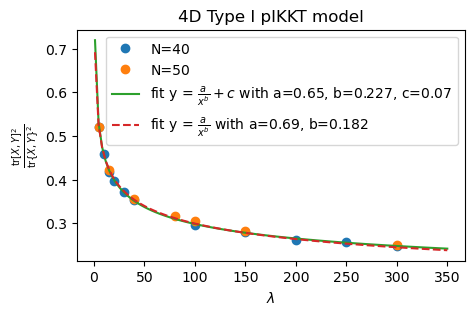

In [7]:
power_law = lambda x, a, b, c: a * x**(-b) + c
power_law2 = lambda x, a, b: a * x**(-b)
ys = [np.mean(-data2N40[g][50:, 0].real / data2N40[g][50:, 1].real) for g in gs40]
popt, pcov = curve_fit(power_law, gs40, ys, p0=[1, 0.5, 0.2], maxfev=10000)
popt2, pcov2 = curve_fit(power_law2, gs40, ys, p0=[1, 0.5], maxfev=10000)
plt.plot(np.array(gs40), ys, 'o', label="N=40")
plt.plot(np.array(gs50), [np.mean(-data2N50[g][50:, 0].real / data2N50[g][50:, 1].real) for g in gs50], 'o', label="N=50")
plt.plot(xs:=np.linspace(1, 350, 100), power_law(xs, *popt), '-', label=f"fit y = $\\frac{{a}}{{x^b}} + c$ with a={popt[0]:.2f}, b={popt[1]:.3f}, c={popt[2]:.2f}")
plt.plot(xs:=np.linspace(1, 350, 100), power_law2(xs, *popt2), '--', label=f"fit y = $\\frac{{a}}{{x^b}}$ with a={popt2[0]:.2f}, b={popt2[1]:.3f}")
# plt.ylabel("tr$[X,Y]^2$ / tr$\{X,Y\}^2$")
plt.ylabel(r"$\frac{\mathrm{tr}[X,Y]^2}{\mathrm{tr}\{X,Y\}^2}$")
plt.xlabel("$\\lambda$")
plt.title(f"4D Type I pIKKT model")
plt.legend()

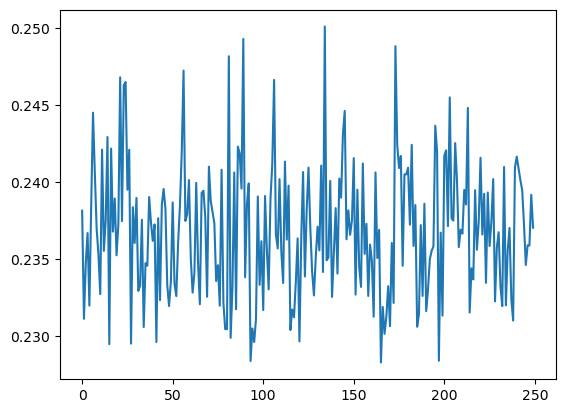

In [6]:
plt.plot(np.mean(dataN40[150.0][50:, :4*NCOL].real**2 / NCOL, axis=1))
# plt.plot(np.mean(dataN40[30.0][50:, NCOL:2*NCOL]**2 / NCOL, axis=1))
# plt.plot(np.mean(dataN40[30.0][50:, 2*NCOL:3*NCOL]**2 / NCOL, axis=1))
# plt.plot(np.mean(dataN40[30.0][50:, 3*NCOL:4*NCOL]**2 / NCOL, axis=1))

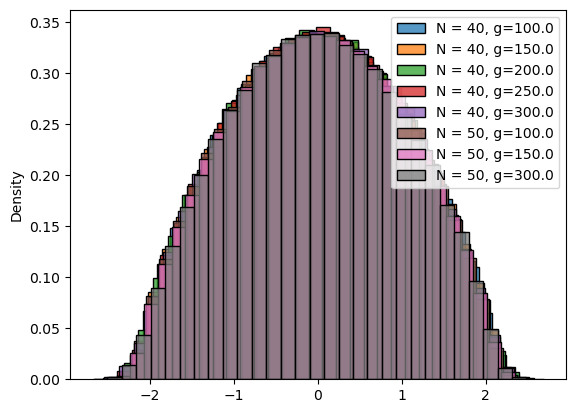

In [7]:
for g in gs40[6:]:
    ys = ((tmp:=dataN40[g][50:, :4*40].real.flatten()) - np.mean(tmp)) / (np.mean(tmp**2)**0.5)
    sns.histplot(ys, bins=30, stat='density', label=f"N = 40, g={g}")
for g in gs50[4:]:
    ys = ((tmp:=dataN50[g][50:, :4*50].real.flatten()) - np.mean(tmp)) / (np.mean(tmp**2)**0.5)
    sns.histplot(ys, bins=30, stat='density', label=f"N = 50, g={g}")
plt.legend()
# for g in gs50[4:]:
#     ys = ((tmp:=dataN50[g][50:, :50].real.flatten()) - np.mean(tmp)) / (np.mean(tmp**2)**0.5)
#     density = stats.gaussian_kde(ys)
#     n, x, _ = plt.hist(ys, bins=30, edgecolor='black', rwidth=0, density=True, alpha=0.5)
#     plt.plot(x, density(x), label=f"N = 50, g={g}")
# plt.legend()

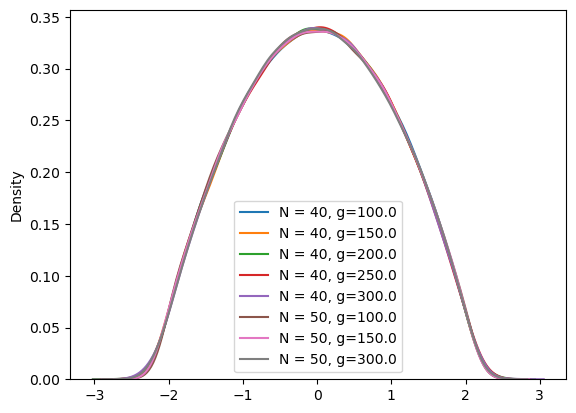

In [13]:
for g in gs40[6:]:
    ys = ((tmp:=dataN40[g][50:, :4*40].real.flatten()) - np.mean(tmp)) / (np.mean(tmp**2)**0.5)
    sns.kdeplot(ys, label=f"N = 40, g={g}")
for g in gs50[4:]:
    ys = ((tmp:=dataN50[g][50:, :4*50].real.flatten()) - np.mean(tmp)) / (np.mean(tmp**2)**0.5)
    sns.kdeplot(ys, label=f"N = 50, g={g}")
# plt.plot(xs:=np.linspace(-np.sqrt(5), np.sqrt(5), 100), (5-xs**2) / (4/3 * 5**(3/2)), color='black', label="Parabola")

plt.legend()

# 4D IKKT Type I with source

In [8]:
dataN40 = {}
data2N40 = {}
dataN50 = {}
data2N50 = {}
dataSourceN40g150 = {}
gs40 = [5.,10.,15., 20., 30., 40., 100., 150., 200., 250., 300.]
gs50 = [5., 15., 40., 80., 100., 150., 300.]
alphas = [0.5, 1, 2, 4, 6, 10]
for g in gs40:
    saveFileEv = f"eigenvalues_{namePrefix}_{NMAT}d_g{round(g,4)}_N{NCOL}.dat"
    saveFileComms = f"comm2_{namePrefix}_{NMAT}d_g{round(g,4)}_N{NCOL}.dat"
    dataN40[g] = np.fromfile(saveFileEv, dtype=np.complex128).reshape(-1, 5 * NCOL)
    data2N40[g] = np.fromfile(saveFileComms, dtype=np.complex128).reshape(-1, 2)
for g in gs50:
    saveFileEv = f"eigenvalues_{namePrefix}_{NMAT}d_g{round(g,4)}_N{50}.dat"
    saveFileComms = f"comm2_{namePrefix}_{NMAT}d_g{round(g,4)}_N{50}.dat"
    dataN50[g] = np.fromfile(saveFileEv, dtype=np.complex128).reshape(-1, 5 * 50)
    data2N50[g] = np.fromfile(saveFileComms, dtype=np.complex128).reshape(-1, 2)

dataSourceN40g150[0.5] = np.fromfile(f"eigenvalues_{namePrefix}_Line0.5_g150.0_N40.dat", dtype=np.complex128).reshape(-1, 5 * 40)

for a in alphas[1:]:
    dataSourceN40g150[a] = np.fromfile(f"eigenvalues_{namePrefix}_Line{a}_g150.0_N40.dat", dtype=np.complex128).reshape(-1, 5 * 40)

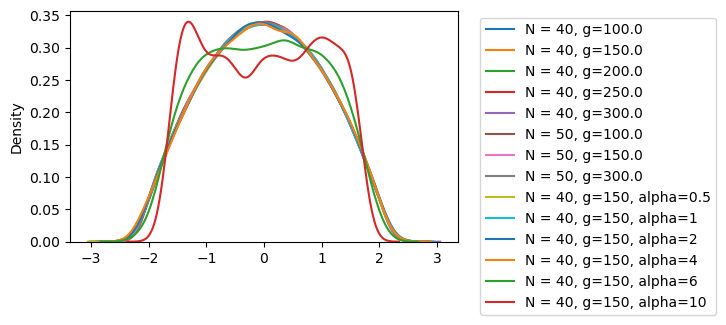

In [15]:
for g in gs40[6:]:
    ys = ((tmp:=dataN40[g][50:, :4*40].real.flatten()) - np.mean(tmp)) / (np.mean(tmp**2)**0.5)
    sns.kdeplot(ys, label=f"N = 40, g={g}")
for g in gs50[4:]:
    ys = ((tmp:=dataN50[g][50:, :4*50].real.flatten()) - np.mean(tmp)) / (np.mean(tmp**2)**0.5)
    sns.kdeplot(ys, label=f"N = 50, g={g}")
for a in alphas[:]:
    ys = ((tmp:=dataSourceN40g150[a][50:, :40].real.flatten()) - np.mean(tmp)) / (np.mean(tmp**2)**0.5)
    sns.kdeplot(ys, label=f"N = 40, g=150, alpha={a}")
plt.legend(bbox_to_anchor=(1.04, 1))

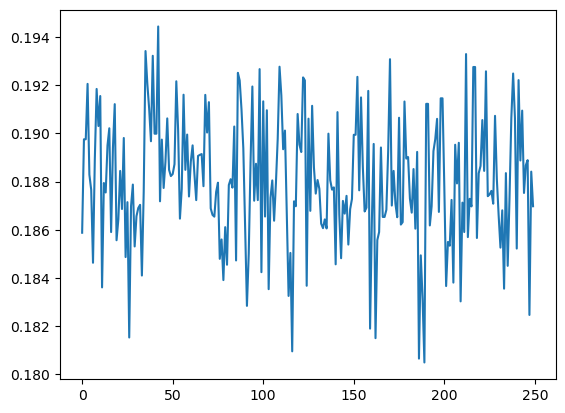

In [12]:
plt.plot(np.mean(dataN50[150.0][50:, :4*50].real**2 / 50, axis=1))

# Breaking SUSY

### Changing Number of Fermions

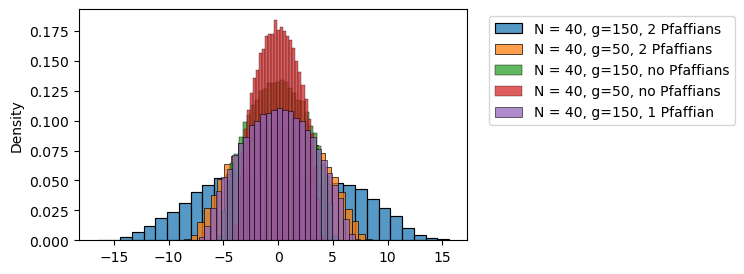

In [19]:
twoPfaffg150 = np.fromfile(f"eigenvalues_twoPfaff4dIKKT_1.0FermMass_g150.0_N40.dat", dtype=np.complex128).reshape(-1, 5 * NCOL)
twoPfaffg50 = np.fromfile(f"eigenvalues_twoPfaff4dIKKT_1.0FermMass_g50.0_N40.dat", dtype=np.complex128).reshape(-1, 5 * NCOL)
noPfaffg150 = np.fromfile(f"eigenvalues_noPfaff4dIKKT_1.0FermMass_g150.0_N40.dat", dtype=np.complex128).reshape(-1, 5 * NCOL)
noPfaffg50 = np.fromfile(f"eigenvalues_noPfaff4dIKKT_1.0FermMass_g50.0_N40.dat", dtype=np.complex128).reshape(-1, 5 * NCOL)
onePfaffg150 = np.fromfile(f"eigenvalues_pIkkt_type1_4d_g150.0_N40.dat", dtype=np.complex128).reshape(-1, 5 * NCOL)

ys = ((tmp:=twoPfaffg150[100:, :4*NCOL].real.flatten()) - np.mean(tmp))# / (np.mean(tmp**2)**0.5)
sns.histplot(ys, bins=30, stat='density', label=f"N = 40, g=150, 2 Pfaffians")
ys = ((tmp:=twoPfaffg50[100:, :4*NCOL].real.flatten()) - np.mean(tmp))# / (np.mean(tmp**2)**0.5)
sns.histplot(ys, bins=30, stat='density', label=f"N = 40, g=50, 2 Pfaffians")
ys = ((tmp:=noPfaffg150[100:, :4*NCOL].real.flatten()) - np.mean(tmp))# / (np.mean(tmp**2)**0.5)
sns.histplot(ys, bins=30, stat='density', label=f"N = 40, g=150, no Pfaffians")
ys = ((tmp:=noPfaffg50[100:, :4*NCOL].real.flatten()) - np.mean(tmp))# / (np.mean(tmp**2)**0.5)
sns.histplot(ys, bins=30, stat='density', label=f"N = 40, g=50, no Pfaffians")
ys = ((tmp:=onePfaffg150[100:, :4*NCOL].real.flatten()) - np.mean(tmp))# / (np.mean(tmp**2)**0.5)
sns.histplot(ys, bins=30, stat='density', label=f"N = 40, g=150, 1 Pfaffian")
plt.legend(bbox_to_anchor=(1.04, 1))

### Changing Fermion Mass  by a factor $\Omega$

In [4]:
susybreakingN40g50 = {}
susybreakingN40g150 = {}
commsbreakingN40g50 = {}
commsbreakingN40g150 = {}
evalsfermMasspt01 = {}
commsfermMasspt01 = {}
evalsOmegapt5 = {}
commsOmegapt5 = {}
gsFerm = np.array([20, 40, 50, 60, 120, 140, 150, 160])*1.
gsOmegapt5 = np.arange(20, 220, 20.)
omegas = [4.,2.,0.5,0.2,0.01]

for omega in omegas:
    susybreakingN40g150[omega] = np.fromfile(f"eigenvalues_noSusy4dIKKT_{round(omega,2)}FermMass_g150.0_N40.dat", dtype=np.complex128).reshape(-1, 5 * NCOL)
    commsbreakingN40g150[omega] = np.fromfile(f"comm2_noSusy4dIKKT_{round(omega,2)}FermMass_g150.0_N40.dat", dtype=np.complex128).reshape(-1, 2)
    susybreakingN40g50[omega] = np.fromfile(f"eigenvalues_noSusy4dIKKT_{round(omega,2)}FermMass_g50.0_N40.dat", dtype=np.complex128).reshape(-1, 5 * NCOL)
    commsbreakingN40g50[omega] = np.fromfile(f"comm2_noSusy4dIKKT_{round(omega,2)}FermMass_g50.0_N40.dat", dtype=np.complex128).reshape(-1, 2)
for g in gsFerm:
    evalsfermMasspt01[g] = np.fromfile(f"eigenvalues_noSusy4dIKKT_0.01FermMass_g{round(g,4)}_N40.dat", dtype=np.complex128).reshape(-1, 5 * NCOL)
    commsfermMasspt01[g] =  np.fromfile(f"comm2_noSusy4dIKKT_0.01FermMass_g{round(g,4)}_N40.dat", dtype=np.complex128).reshape(-1, 2)
for g in gsOmegapt5:
    evalsOmegapt5[g] = np.fromfile(f"eigenvalues_noSusy4dIKKT_0.5FermMass_g{round(g,4)}_N40.dat", dtype=np.complex128).reshape(-1, 5 * NCOL)
    commsOmegapt5[g] =  np.fromfile(f"comm2_noSusy4dIKKT_0.5FermMass_g{round(g,4)}_N40.dat", dtype=np.complex128).reshape(-1, 2)
susypreservingN40g150 = np.fromfile(f"eigenvalues_noSusy4dIKKT_1.0FermMass_g150.0_N40.dat", dtype=np.complex128).reshape(-1, 5 * NCOL)
commspreservingN40g150 = np.fromfile(f"comm2_noSusy4dIKKT_1.0FermMass_g150.0_N40.dat", dtype=np.complex128).reshape(-1, 2)
susypreservingN40g50 = np.fromfile(f"eigenvalues_noSusy4dIKKT_1.0FermMass_g50.0_N40.dat", dtype=np.complex128).reshape(-1, 5 * NCOL)
commspreservingN40g50 = np.fromfile(f"comm2_noSusy4dIKKT_1.0FermMass_g50.0_N40.dat", dtype=np.complex128).reshape(-1, 2)

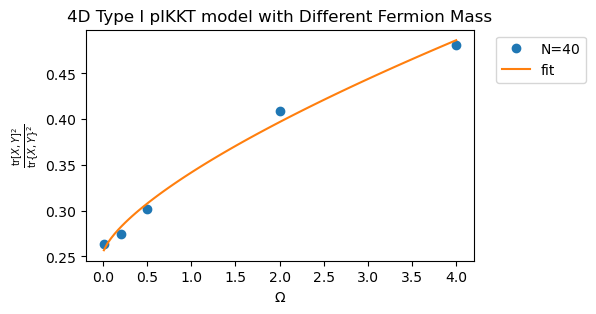

In [23]:
fit = lambda x, a, b, c: a * x**b + c
ys = [np.mean(-commsbreakingN40g50[g][50:, 0].real / commsbreakingN40g50[g][50:, 1].real) for g in omegas]
popt, pcov = curve_fit(fit, omegas, ys, p0=[1, 0.5, 0.2], maxfev=10000)
plt.plot(np.array(omegas), ys, 'o', label="N=40")
plt.plot(xs:=np.linspace(0.01, 4, 100), fit(xs, *popt), '-', label=f"fit")
# plt.ylabel("tr$[X,Y]^2$ / tr$\{X,Y\}^2$")
plt.ylabel(r"$\frac{\mathrm{tr}[X,Y]^2}{\mathrm{tr}\{X,Y\}^2}$")
plt.xlabel("$\\Omega$")
plt.title(f"4D Type I pIKKT model with Different Fermion Mass")
plt.legend(bbox_to_anchor=(1.04, 1))

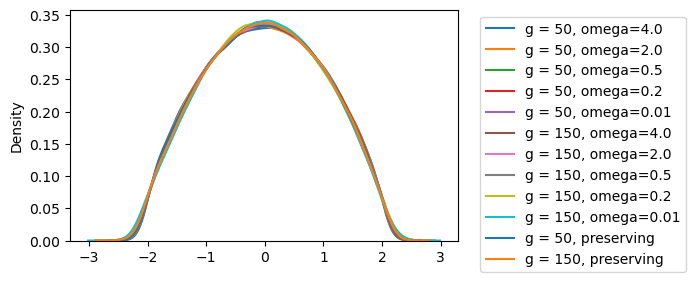

In [28]:
for omega in [4.,2.,0.5,0.2,0.01]:
    ys = ((tmp:=susybreakingN40g50[omega][50:, :4*NCOL].real.flatten()) - np.mean(tmp)) / (np.mean(tmp**2)**0.5)
    sns.kdeplot(ys, label=f"g = 50, omega={omega}")
for omega in [4.,2.,0.5,0.2,0.01]:
    ys = ((tmp:=susybreakingN40g150[omega][50:, :4*NCOL].real.flatten()) - np.mean(tmp)) / (np.mean(tmp**2)**0.5)
    sns.kdeplot(ys, label=f"g = 150, omega={omega}")
ys = ((tmp:=susypreservingN40g50[50:, :4*NCOL].real.flatten()) - np.mean(tmp)) / (np.mean(tmp**2)**0.5)
sns.kdeplot(ys, label=f"g = 50, preserving")
ys = ((tmp:=susypreservingN40g150[50:, :4*NCOL].real.flatten()) - np.mean(tmp)) / (np.mean(tmp**2)**0.5)
sns.kdeplot(ys, label=f"g = 150, preserving")
plt.legend(bbox_to_anchor=(1.04, 1))

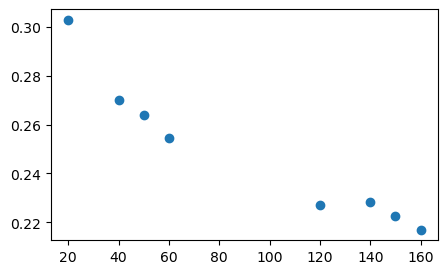

In [66]:
plt.plot(gsFerm, np.array([np.mean(-commsfermMasspt01[g][50:, 0] / commsfermMasspt01[g][50:, 1]) for g in gsFerm]).real, 'o')

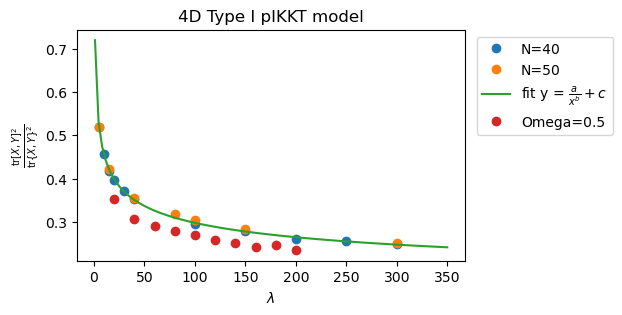

In [14]:
power_law = lambda x, a, b, c: a * x**(-b) + c
power_law2 = lambda x, a, b: a * x**(-b)
ys = [np.mean(-data2N40[g][50:, 0].real / data2N40[g][50:, 1].real) for g in gs40]
popt, pcov = curve_fit(power_law, gs40, ys, p0=[1, 0.5, 0.2], maxfev=10000)
popt2, pcov2 = curve_fit(power_law2, gs40, ys, p0=[1, 0.5], maxfev=10000)
plt.plot(np.array(gs40), ys, 'o', label="N=40")
plt.plot(np.array(gs50), [np.mean(-data2N50[g][50:, 0].real / data2N50[g][50:, 1].real) for g in gs50], 'o', label="N=50")
plt.plot(xs:=np.linspace(1, 350, 100), power_law(xs, *popt), '-', label=f"fit y = $\\frac{{a}}{{x^b}} + c$")
plt.plot(gsOmegapt5, np.array([np.mean(-commsOmegapt5[g][50:, 0] / commsOmegapt5[g][50:, 1]) for g in gsOmegapt5]).real, 'o', label="Omega=0.5")
plt.ylabel(r"$\frac{\mathrm{tr}[X,Y]^2}{\mathrm{tr}\{X,Y\}^2}$")
plt.xlabel("$\\lambda$")
plt.title(f"4D Type I pIKKT model")
plt.legend(bbox_to_anchor=(1.4, 1))

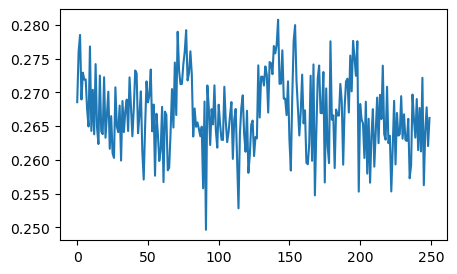

In [58]:
# plt.plot(np.mean(evalsfermMasspt01[40.0][50:, :4*NCOL].real**2 / NCOL, axis=1))
# plt.plot(np.mean(evalsfermMasspt01[140.0][50:, :4*NCOL].real**2 / NCOL, axis=1))
plt.plot(np.mean(evalsfermMasspt01[150.0][50:, :4*NCOL].real**2 / NCOL, axis=1))

<Axes: ylabel='Density'>

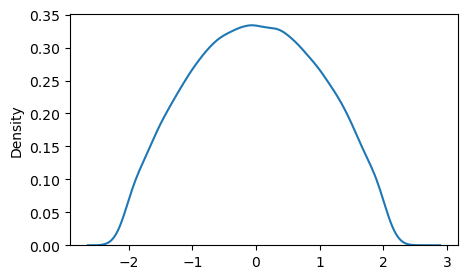

In [37]:
sns.kdeplot(standardize(evalsfermMasspt01[20.0][50:,:4*40].flatten().real))

# Type II polarized IKKT in D=4

In [6]:
evalstypeIIN40Omega1 = {}
commstypeIIN40Omega1 = {}
gsTypeII = np.arange(20, 220, 20.)
for g in gsTypeII:
    evalstypeIIN40Omega1[g] = np.fromfile(f"eigenvalues_pIkkt_type2_Omega1.0_g{round(g,2)}_N40.dat", dtype=np.complex128).reshape(-1, 6 * NCOL)
    commstypeIIN40Omega1[g] = np.fromfile(f"comm2_pIkkt_type2_Omega1.0_g{round(g,2)}_N40.dat", dtype=np.complex128).reshape(-1, 2)

<Axes: ylabel='Density'>

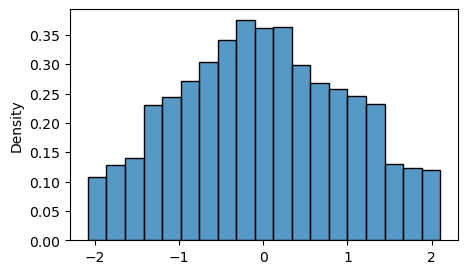

In [35]:
sns.histplot(standardize(evalstypeIIN40Omega1[200.][280:, :3*40].flatten().real), stat='density')

[(20.0, 0.03839411929878491), (40.0, 0.039182366091913556), (60.0, 0.031007218862681405), (80.0, 0.027887357119821796), (100.0, 0.02021767320071133), (120.0, 0.03239935744614992), (140.0, 0.03303405761252368), (160.0, 0.015486582477119086), (180.0, 0.0242207136027415), (200.0, 0.023598779465631173)]


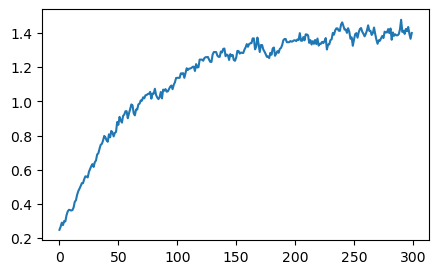

In [4]:
print([(g,np.mean(-commstypeIIN40Omega1[g][40:, 0].real / commstypeIIN40Omega1[g][40:, 1].real)) for g in gsTypeII])
plt.plot(np.mean(evalstypeIIN40Omega1[140.0][:, :3*NCOL].real**2 / NCOL, axis=1))

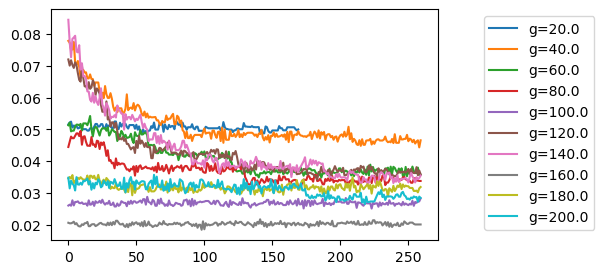

In [21]:
for g1 in gsTypeII:
    plt.plot((-commstypeIIN40Omega1[g1][40:, 0].real / NCOL) / np.mean(evalstypeIIN40Omega1[g1][40:, :3*NCOL].real**4, axis=1), label=f"g={g1}")
plt.legend(bbox_to_anchor=(1.1, 1))

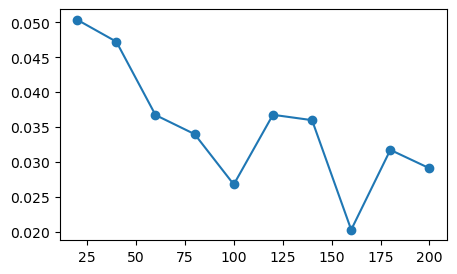

In [6]:
plt.plot(gsTypeII, [np.mean((-commstypeIIN40Omega1[g1][-100:, 0].real / NCOL) / np.mean(evalstypeIIN40Omega1[g1][-100:, :3*NCOL].real**4, axis=1)) for g1 in gsTypeII], 'o-')

In [158]:
NCOL = 30
evalsCheck = {}
evalsCheck1 = {}
commsCheck = {}
commsCheck1 = {}

evalsCheck = np.fromfile(f"eigenvalues_check_type2_Omega1.0_g20.0_N30.dat", dtype=np.complex128).reshape(-1, 6 * NCOL)
commsCheck = np.fromfile(f"comm2_check_type2_Omega1.0_g20.0_N30.dat", dtype=np.complex128).reshape(-1, 4)
evalsCheck1 = np.fromfile(f"eigenvalues_check1_type2_Omega1.0_g20.0_N30.dat", dtype=np.complex128).reshape(-1, 6 * NCOL)
commsCheck1 = np.fromfile(f"comm2_check1_type2_Omega1.0_g20.0_N30.dat", dtype=np.complex128).reshape(-1, 4)

<Axes: ylabel='Density'>

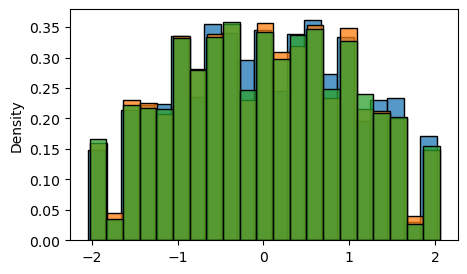

In [159]:
sns.histplot(standardize(evalsCheck[40:, :NCOL].flatten().real), stat='density')
sns.histplot(standardize(evalsCheck[40:, NCOL:2*NCOL].flatten().real), stat='density')
sns.histplot(standardize(evalsCheck[40:, 2*NCOL:3*NCOL].flatten().real), stat='density')

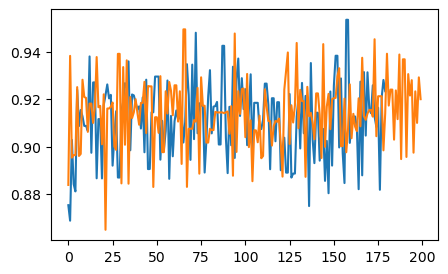

In [160]:
plt.plot(np.mean(evalsCheck[:, :3*NCOL].real**2 / NCOL, axis=1))
plt.plot(np.mean(evalsCheck1[:, :3*NCOL].real**2 / NCOL, axis=1))

<Axes: ylabel='Density'>

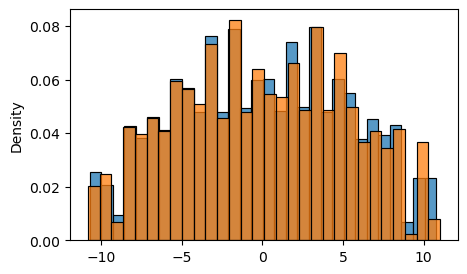

In [161]:
d1 = evalsCheck[20:, :3*NCOL].flatten().real
d2 = evalsCheck1[20:, :3*NCOL].flatten().real
sns.histplot(d1, stat='density', bins=30)
sns.histplot(d2, stat='density', bins=30)

In [123]:
print(evalsCheck[-30:-10, :3*NCOL].flatten().real.shape)
print(evalsCheck[-30:-20, :3*NCOL].flatten().real.shape)
print(evalsCheck[-20:-10, :3*NCOL].flatten().real.shape)

(1800,)
(900,)
(900,)


<Axes: ylabel='Density'>

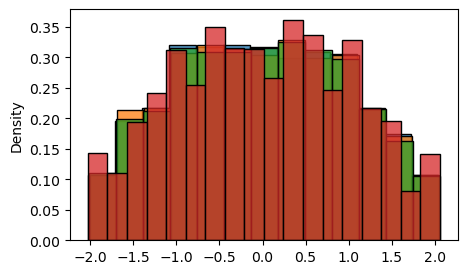

In [112]:
sns.histplot(standardize(evalsCheck[-10:, :3*NCOL].flatten().real), stat='density')
sns.histplot(standardize(evalsCheck[-20:-10, :3*NCOL].flatten().real), stat='density')
sns.histplot(standardize(evalsCheck[-30:-20, :3*NCOL].flatten().real), stat='density')
sns.histplot(standardize(evalsCheck[-30:, :3*NCOL].flatten().real), stat='density')
# sns.histplot(standardize(evalsCheck[50:, :3*NCOL].flatten().real), stat='density')
# sns.histplot(standardize(evalsCheck1[-20:, NCOL:2*NCOL].flatten().real), stat='density')
# sns.histplot(standardize(evalsCheck1[-20:, 2*NCOL:3*NCOL].flatten().real), stat='density')

# Type II, looking for fuzzy spheres

In [3]:
evalsSpin = {}
commsSpin = {}
spins = [0, 0.5, 2]
for s in spins:
    evalsSpin[s] = np.fromfile(f"eigenvalues_spin{s}_type2_Omega1.0_g20.0_N40.dat", dtype=np.complex128).reshape(-1, 6 * NCOL)
    commsSpin[s] = np.fromfile(f"comm2_spin{s}_type2_Omega1.0_g20.0_N40.dat", dtype=np.complex128).reshape(-1, 4)

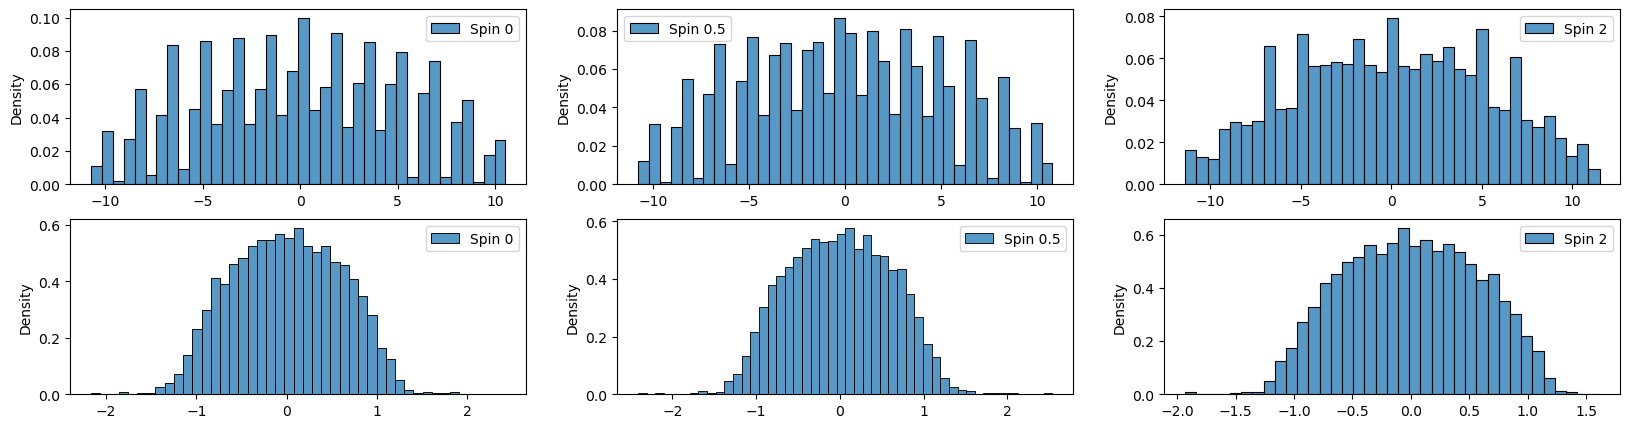

In [4]:
fig, axes = plt.subplots(2, 3, figsize=(20, 5))
sns.histplot(evalsSpin[0][50:, :3*40].flatten().real, label="Spin 0", stat='density', ax=axes[0, 0])
sns.histplot(evalsSpin[0.5][50:, :3*40].flatten().real, label="Spin 0.5", stat='density', ax=axes[0, 1])
sns.histplot(evalsSpin[2][50:, :3*40].flatten().real, label="Spin 2", stat='density', ax=axes[0, 2])

sns.histplot(evalsSpin[0][50:, 3*40:4*40].flatten().real, label="Spin 0", stat='density', ax=axes[1, 0])
sns.histplot(evalsSpin[0.5][50:, 3*40:4*40].flatten().real, label="Spin 0.5", stat='density', ax=axes[1, 1])
sns.histplot(evalsSpin[2][50:, 3*40:4*40].flatten().real, label="Spin 2", stat='density', ax=axes[1, 2])

for i in range(3):
    axes[0, i].legend()
    axes[1, i].legend()

In [5]:
evalsSpin0g1 = np.fromfile(f"eigenvalues_spin0_type2_Omega1.0_g1.0_N40.dat", dtype=np.complex128).reshape(-1, 7 * 40)
commsSpin0g1 = np.fromfile(f"comm2_spin0_type2_Omega1.0_g1.0_N40.dat", dtype=np.complex128).reshape(-1, 4)
evalsSpin0g1Run2 = np.fromfile(f"eigenvalues_spin0InitRun2_type2_Omega1.0_g1.0_N40.dat", dtype=np.complex128).reshape(-1, 7 * 40)
commsSpin0g1Run2 = np.fromfile(f"comm2_spin0InitRun2_type2_Omega1.0_g1.0_N40.dat", dtype=np.complex128).reshape(-1, 4)
evalsSpin0g150 = np.fromfile(f"eigenvalues_spin0Init_type2_Omega1.0_g150.0_N40.dat", dtype=np.complex128).reshape(-1, 7 * 40)
commsSpin0g150 = np.fromfile(f"comm2_spin0Init_type2_Omega1.0_g150.0_N40.dat", dtype=np.complex128).reshape(-1, 4)

NCOL = 45
evalsSpin0g1Run3 = np.fromfile(f"eigenvalues_spin0InitRun2_type2_Omega1.0_g1.0_N45.dat", dtype=np.complex128).reshape(-1, 7 * 45)
commsSpin0g1Run3 = np.fromfile(f"comm2_spin0InitRun2_type2_Omega1.0_g1.0_N45.dat", dtype=np.complex128).reshape(-1, 4)
evalsSpin0g10 = np.fromfile(f"eigenvalues_spin0Init_type2_Omega1.0_g10.0_N45.dat", dtype=np.complex128).reshape(-1, 7 * NCOL)
commsSpin0g10 = np.fromfile(f"comm2_spin0Init_type2_Omega1.0_g10.0_N45.dat", dtype=np.complex128).reshape(-1, 4)
evalsSpin0g100 = np.fromfile(f"eigenvalues_spin0Init_type2_Omega1.0_g100.0_N45.dat", dtype=np.complex128).reshape(-1, 7 * NCOL)
commsSpin0g100 = np.fromfile(f"comm2_spin0Init_type2_Omega1.0_g100.0_N45.dat", dtype=np.complex128).reshape(-1, 4)

In [6]:
from ipywidgets import interact
import ipywidgets as widgets

@interact(r=widgets.FloatSlider(min=0, max=0.15, step=0.01, value=0.1))
def plot_with_lines(r):
    sns.histplot(1/40 * evalsSpin0g1[120:, -40:].flatten().real, stat='density', label="Spin 0, g=1.0", bins=50)
    
    # Plot vertical lines at r*j(j+1) for j = 0.5, 1, 1.5, ..., 3.5
    for j in [0.5 + 0.5*i for i in range(7)]:
        plt.axvline(r * j * (j + 1), color='red', linestyle='--', alpha=0.7)
    
    plt.legend()
    plt.xlabel('Eigenvalue')
    plt.ylabel('Density')
    plt.show()

interactive(children=(FloatSlider(value=0.1, description='r', max=0.15, step=0.01), Output()), _dom_classes=('…

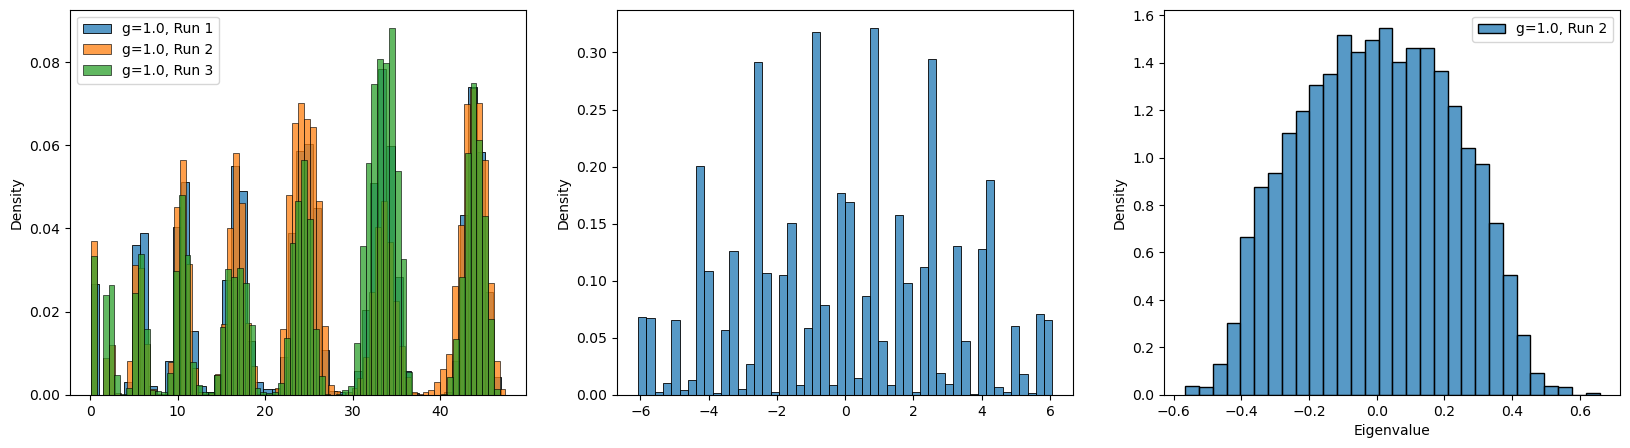

In [7]:
fig, axes = plt.subplots(1,3, figsize=(20,5))
sns.histplot(evalsSpin0g1[120:, -40:].flatten().real, stat='density', label="g=1.0, Run 1", bins=50, ax=axes[0])    
sns.histplot(evalsSpin0g1Run2[140:, -40:].flatten().real, stat='density', label="g=1.0, Run 2", bins=70, ax=axes[0])
sns.histplot(evalsSpin0g1Run3[140:, -45:].flatten().real, stat='density', label="g=1.0, Run 3", bins=70, ax=axes[0])
axes[0].legend()
sns.histplot(evalsSpin0g1Run2[140:, 40:3*40].flatten().real, stat='density', label="g=1.0, Run 2", bins=50, ax=axes[1])
sns.histplot(evalsSpin0g1Run2[140:, 3*40:4*40].flatten().real, stat='density', label="g=1.0, Run 2", bins=30, ax=axes[2])
plt.legend()
plt.xlabel('Eigenvalue')
plt.ylabel('Density')
plt.show()

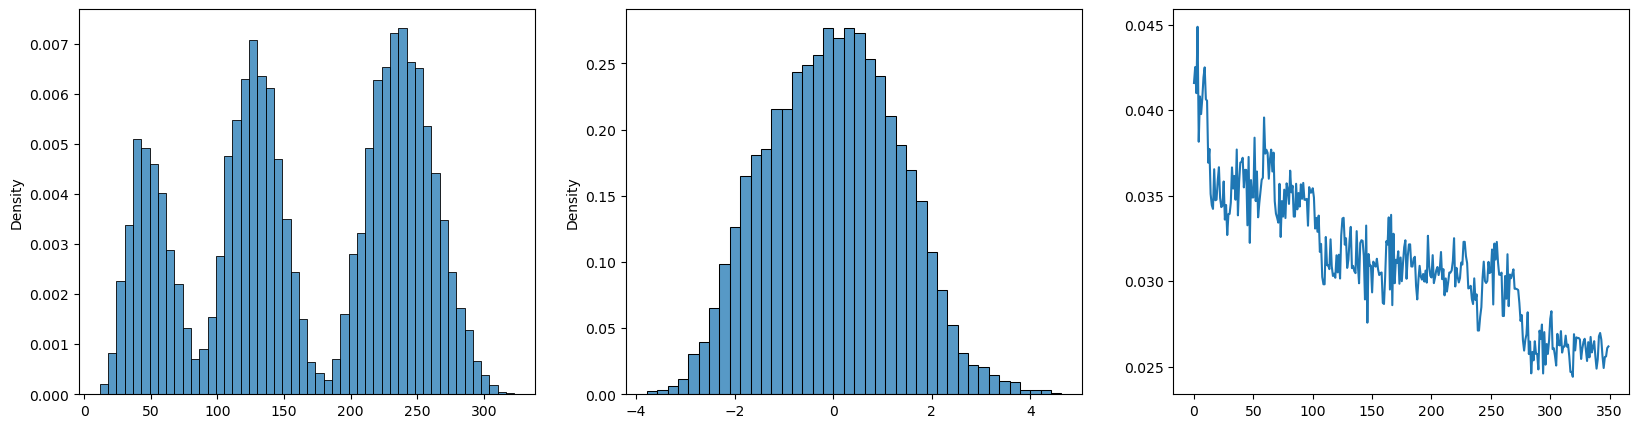

In [18]:
fig, axes = plt.subplots(1,3, figsize=(20,5))
# sns.histplot(1/45 * evalsSpin0g1[100:150, -45:].flatten().real, stat='density', label="Spin 0, g=10.0", bins=70, ax=axes[0])
sns.histplot(evalsSpin0g150[200:, -40:].flatten().real, stat='density', label="Spin 0, g=150.0", bins=50, ax=axes[0])
sns.histplot(evalsSpin0g150[200:, 3*40:4*40].flatten().real, stat='density', label="Spin 0, g=150.0", bins=40, ax=axes[1])
axes[2].plot((-commsSpin0g150[50:, 0].real) / commsSpin0g150[50:, 1].real)

# @interact(r=widgets.FloatSlider(min=0, max=0.15, step=0.01, value=0.1))
# def plot_with_lines(r):
#     sns.histplot(1/45 * evalsSpin0g10[200:, -45:].flatten().real, stat='density', label="Spin 0, g=10.0", bins=70)
    
#     # Plot vertical lines at r*j(j+1) for j = 0.5, 1, 1.5, ..., 3.5
#     for j in [0.5 + 0.5*i for i in range(7)]:
#         plt.axvline(r * j * (j + 1), color='red', linestyle='--', alpha=0.7)
    
#     plt.legend()
#     plt.xlabel('Eigenvalue')
#     plt.ylabel('Density')
#     plt.show()

<Axes: ylabel='Density'>

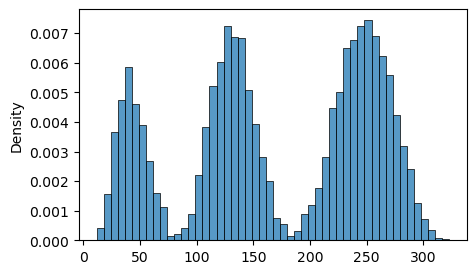

In [22]:
sns.histplot(evalsSpin0g150[300:, -40:].flatten().real, stat='density', label="Spin 0, g=150.0", bins=50)

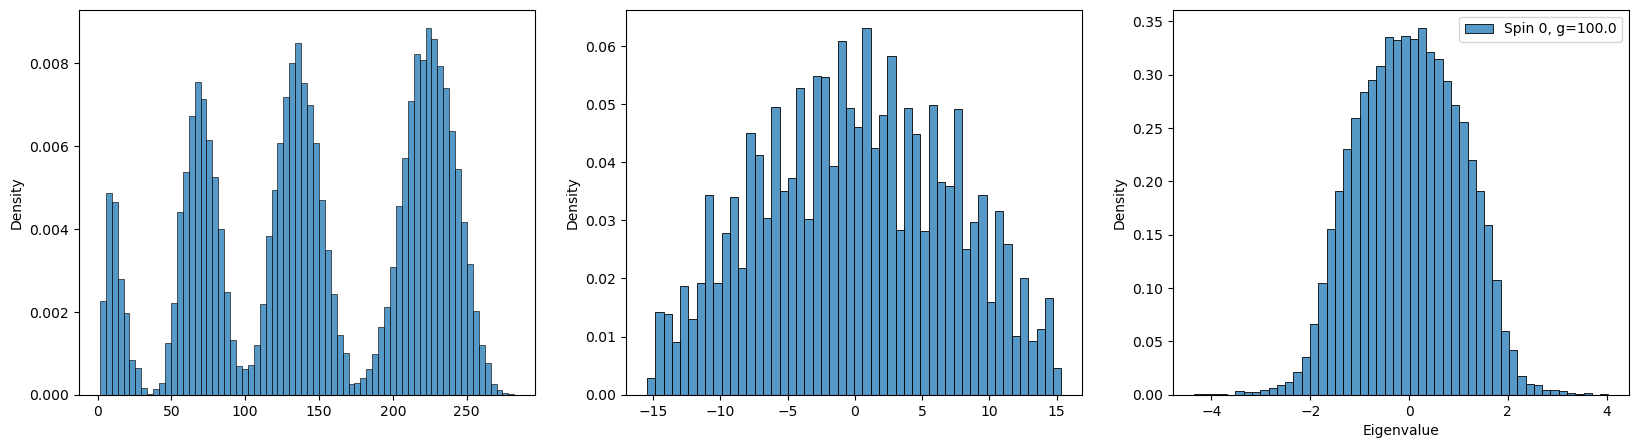

In [9]:
fig, axes = plt.subplots(1,3, figsize=(20,5))
sns.histplot(evalsSpin0g100[100:, -45:].flatten().real, stat='density', label="Spin 0, g=100.0", bins=70, ax=axes[0])
sns.histplot(evalsSpin0g100[100:, 45:3*45].flatten().real, stat='density', label="Spin 0, g=100.0", bins=50, ax=axes[1])
sns.histplot(evalsSpin0g100[100:, 3*45:4*45].flatten().real, stat='density', label="Spin 0, g=100.0", bins=50, ax=axes[2])
plt.legend()
plt.xlabel('Eigenvalue')
plt.ylabel('Density')
plt.show()

Text(0.5, 1.0, 'tr{X,Y}^2 vs Monte Carlo time')

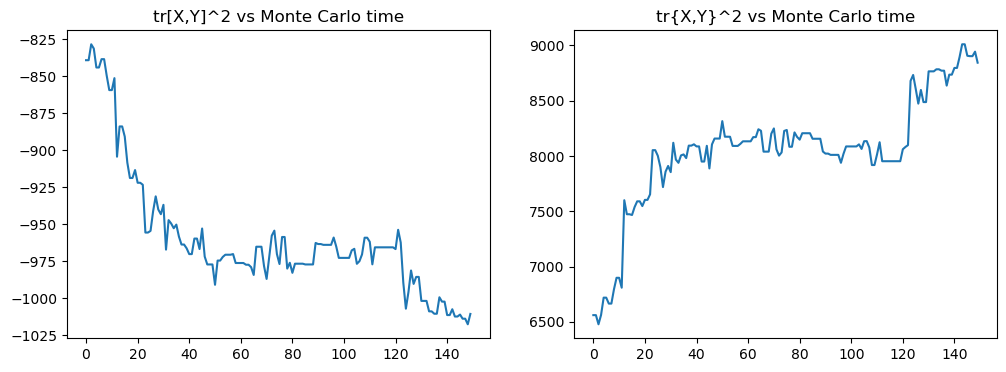

In [21]:
figs, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].plot(commsSpin0g1[50:, 0].real)
axes[1].plot(commsSpin0g1[50:, 1].real)
axes[0].set_title("tr[X,Y]^2 vs Monte Carlo time")
axes[1].set_title("tr{X,Y}^2 vs Monte Carlo time")